In [1]:
from processor import DMTimeDataSetCreator

In [2]:
# Example of using the processor
config_path = "config_testrun.json"
processor = DMTimeDataSetCreator(config_path)

Processing files:   0%|          | 0/256 [00:00<?, ?it/s]

Processing files: 100%|██████████| 256/256 [00:17<00:00, 14.57it/s]


In [3]:
processor.process()

Processing rest of events: 100%|██████████| 631808/631808 [03:59<00:00, 2635.67it/s]


combine data
combine metadata
combine labels
Saved 4 DM-time shard(s) to /cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/dm_time_shards
DM-time shard manifest written to /cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/dm_time_shards/B0531+21_59000_48386_DM_time_dataset_manifest.json


In [4]:
processor.report_snr_statistics()

=== Dataset Overview ===
Total samples: 1263616
Samples with finite SNR: 631808 (50.00%)
Samples with NaN/inf SNR: 631808
Pulsar samples: 456704 (36.14% of all samples)
Pulsar entries with finite SNR: 456704 (72.29% of finite-SNR samples)

=== SNR Summary (finite values) ===
Min SNR: 3.30
Max SNR: 72.10
Mean SNR: 6.66
Median SNR: 4.90
10th percentile: 4.40
90th percentile: 9.90

=== SNR Spectrum ===
SNR 3: count=512, share=0.08%
SNR 4: count=323584, share=51.22%
SNR 5: count=118272, share=18.72%
SNR 6: count=59136, share=9.36%
SNR 7: count=34816, share=5.51%
SNR 8: count=21760, share=3.44%
SNR 9: count=11520, share=1.82%
SNR 10: count=8448, share=1.34%
SNR 11: count=8704, share=1.38%
SNR 12: count=5888, share=0.93%
SNR 13: count=4608, share=0.73%
SNR 14: count=4608, share=0.73%
SNR 15: count=2816, share=0.45%
SNR 16: count=4096, share=0.65%
SNR 17: count=3072, share=0.49%
SNR 18: count=1024, share=0.16%
SNR 19: count=2816, share=0.45%
SNR 20: count=1536, share=0.24%
SNR 21: count=1536,

In [5]:
processor.get_dedispersed_freq_time()

Creating dedispersed freq-time patches:   0%|          | 133/1263616 [00:00<42:41, 493.25it/s]

Creating dedispersed freq-time patches: 100%|██████████| 1263616/1263616 [42:57<00:00, 490.31it/s] 

Saved 8 dedispersed shard(s) to /cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/dedispersed_freq_time_shards
Dedispersed shard manifest written to /cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/dedispersed_freq_time_shards/B0531+21_59000_48386_dedispersed_freq_time_manifest.json


In [8]:
import numpy as np
dedisp_file = np.load("/cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/dedispersed_freq_time_shards/B0531+21_59000_48386_dedispersed_freq_time_shard_0000.npy")
print(dedisp_file.shape)

label_file = np.load("/cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/B0531+21_59000_48386_DM_time_dataset_realbased_labels.npy")
print(label_file.shape)

metadata_file = np.load("/cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/B0531+21_59000_48386_DM_time_dataset_realbased_metadata.npy")
print(metadata_file.shape)

dm_file = np.load("/cephfs/users/oleksjuk/MA/WP2-1/DM_time_dataset_creator/outputs/dm_time_shards/B0531+21_59000_48386_DM_time_dataset_realbased_shard_0000.npy")
print(dm_file.shape)

(163840, 256, 256)
(1263616,)
(1263616, 4)
(327680, 256, 256)


In [23]:
x = 5000

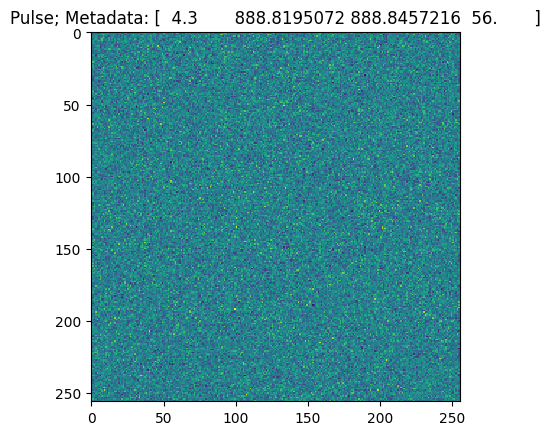

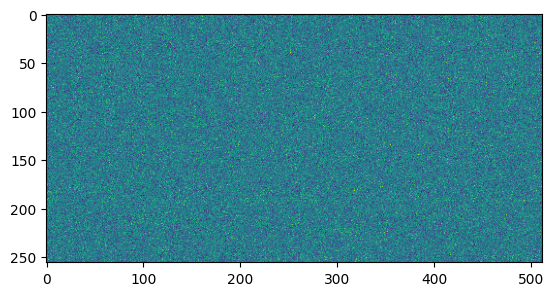

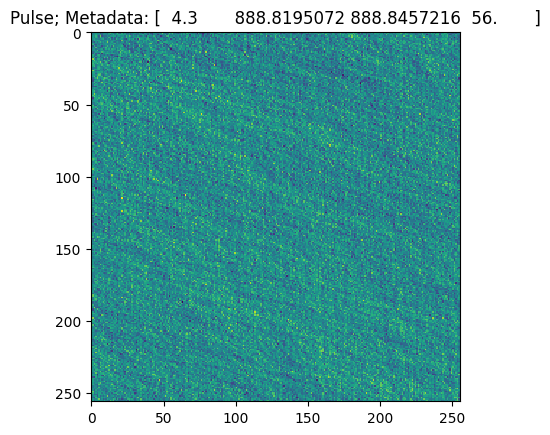

In [24]:
%matplotlib inline

from matplotlib import pyplot as plt


plt.imshow(dedisp_file[x], interpolation='nearest')
plt.title(f"{label_file[x]}; Metadata: {metadata_file[x]}")
plt.show()

hdr = processor.filterbank_file.your_header
tsamp = float(hdr.tsamp)

snr, t_min, t_max, dm = metadata_file[x]

# t_min = Start-Sample im Filterbank
nstart = int(round(t_min / tsamp))

raw_patch = processor.filterbank_file.get_data(nstart, 512).T

plt.imshow(raw_patch)
plt.show()

plt.imshow(dm_file[x], interpolation='nearest')
plt.title(f"{label_file[x]}; Metadata: {metadata_file[x]}")
plt.show()

In [ ]:
fname = "/cephfs/users/oleksjuk/MA/runs/run4_thr6_256_ddm1/run4_thr6_256_ddm1_59000.4839004607_cfbf00000_01_01.px"

from astropy.io import fits
import numpy as np

hdul = fits.open(fname)
hdul.info()

# Beispiel: erstes PCOLOR-HDU (Index 5)
pc1 = hdul[5]
row1 = pc1.data[0]   # einzige Zeile

x1 = np.array(row1[0])  # shape (240,)
y1 = np.array(row1[1])  # shape (16,)
z1_flat = np.array(row1[2])  # shape (3840,)
z1 = z1_flat.reshape(len(y1), len(x1))  # -> (16, 240)

print("PCOLOR[5]:", x1.shape, y1.shape, z1.shape)


pc2 = hdul[9]
row2 = pc2.data[0]

x2 = np.array(row2[0])  # (240,)
y2 = np.array(row2[1])  # (21,)
z2_flat = np.array(row2[2])  # (5040,)
z2 = z2_flat.reshape(len(y2), len(x2))  # (21, 240)

print("PCOLOR[9]:", x2.shape, y2.shape, z2.shape)


Filename: /cephfs/users/oleksjuk/MA/runs/run4_thr6_256_ddm1/run4_thr6_256_ddm1_59000.4839004607_cfbf00000_01_01.px
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (0, 0)      
  1  AXES          1 BinTableHDU     47   6R x 19C   [1J, 1J, 4E, 4E, 4L, 4L, 1L, 1L, 2L, 2L, 2L, 1L, 2L, 2L, 128A, 128A, 128A, 128A, 128A]   
  2  LINE          1 BinTableHDU     20   1R x 2C   [240E, 240E]   
  3  META          1 BinTableHDU     30   19R x 10C   [1J, 1J, 1E, 1E, 128A, 128A, 128A, 128A, 128A, 128A]   
  4  AXVLINE       1 BinTableHDU     20   1R x 2C   [1E, 2E]   
  5  PCOLOR        1 BinTableHDU     20   1R x 3C   [240E, 16E, 3840E]   
  6  LINE          1 BinTableHDU     20   1R x 2C   [16E, 16E]   
  7  AXHLINE       1 BinTableHDU     20   1R x 2C   [2E, 1E]   
  8  AXHLINE       1 BinTableHDU     20   1R x 2C   [2E, 1E]   
  9  PCOLOR        1 BinTableHDU     20   1R x 3C   [240E, 21E, 5040E]   
 10  POINT         1 BinTableHDU     20  

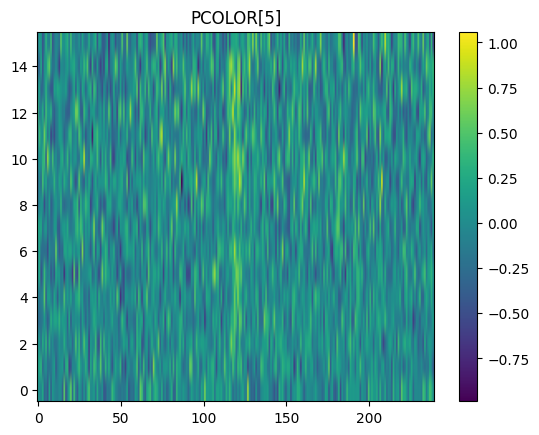

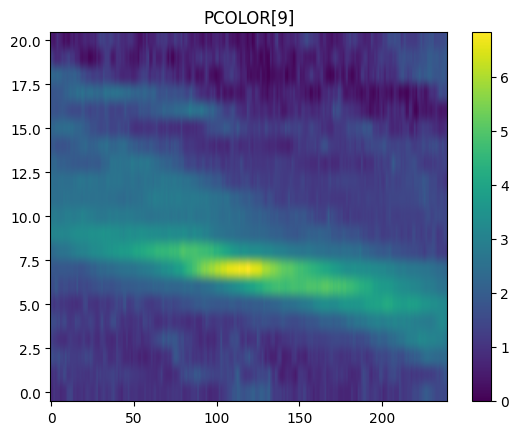

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(z1, aspect="auto", origin="lower")
plt.title("PCOLOR[5]")
plt.colorbar()

plt.figure()
plt.imshow(z2, aspect="auto", origin="lower")
plt.title("PCOLOR[9]")
plt.colorbar()
plt.show()


In [ ]:
z1.shape

(16, 240)